# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

## Домашнее задание №ML4

Это задание основано на *Лабораторной работе №15* курса [Анализ данных (программная инженерия)](http://wiki.cs.hse.ru/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%28%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D0%B6%D0%B5%D0%BD%D0%B5%D1%80%D0%B8%D1%8F%29).

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*) и загрузить его на my.NES.

### PyBrain
Для выполнения практической части этого задания (задачи 2) нужно использовать библиотеку [pybrain](http://pybrain.org). Чтобы её установить, нужно скачать исходный коды с [github](https://github.com/pybrain/pybrain) (кнопка *Clone or download*), распаковать, перейти в соответствующий каталог в командной строке и набрать 
    
    python setup.py install

### Задача 1
Рассмотрим нейронную сеть с одним скрытым слоем, сигмоидной функцией активации и одним выходным нейроном. Предположим, что мы хотим обучить эту сеть с помощью градиентного спуска и обратного распространения ошибки (backpropagation). При этом в качестве начальной точки градиентного спуска мы взяли точку, в которой все веса равны нулю. Найти, чему может при этом равняться вектор градиента (при какой-нибудь обучающей выборке). Как изменятся веса после первого шага градиентного спуска? Что будет происходить на следующих шагах?

Эта задача показывает, почему инциализировать все веса нулями плохо.

Если все веса нули, изменение весов из скрытого слоя в выходной не меняет качества алгоритма -- ведь в скрытом слое все значения нейронов нулевые, поэтому они не изменятся. Но и изменение весов из входа в скрытый слой ничего не меняет. То есть веса всегда остаются нулевыми.

### Задача 2

В этом задании вам нужно приблизить функцию $f(x) = x^3$ на отрезке $[-3, 2]$ с помощью нейросети.

1. С помощью библиотеки *pybrain* создайте архитектуру нейросети, состоящую из следующих слоев: *входной слой* (`pybrain.structure.LinearLayer`) → *скрытый слой* (`pybrain.structure.TanhLayer`) → *выходной слой* (`pybrain.structure.LinearLayer`). Поскольку мы хотим приблизить функцию, действующую из одномерного пространства в одномерное, входной и выходной слои должны иметь размерность 1. Для создания нейросети можно использовать функцию [`pybrain.tools.shortcuts.buildNetwork`](http://pybrain.org/docs/quickstart/network.html).
2. Составьте обучающую выборку  (`pybrain.datasets.SupervisedDataSet`) из $2000$ равномерно распределённых точек на отрезке $[-3 ,2]$, а также две тестовых выборки из $1000$ точек — на том же отрезке и на отрезке $[-3, 3]$.
3. Постройте графики зависимости среднеквадратичной ошибки аппроксимации (`pybrain.tools.validation.ModuleValidator.MSE`) на обеих тестовых выборках в зависимости от числа нейронов в скрытом слое (от $1$ до $101$ с шагом $10$). Делайте не менее $100$ эпох при обучении, используйте уменьшение весов (`weightdecay`) с коэффициентом $10^{-5}$.
    1. Какого минимального числа нейронов достаточно для аппроксимации функции на данном отрезке?
	2. Прокомментируйте отличие ошибок на двух тестовых выборках
	3. Визуализируйте на одном графике $f(x)$ и аппроксимации с помощью нейросети с числом нейронов в скрытом слое $1, 5, 10, 20, 50, 100, 200$ на отрезке $[-3, 3]$. 
4. Повторите исследование в пуктах 2-4, используя в качестве обучающей выборки точки из области $[-3, 1] \cup [2, 3]$. Прокомментируйте разницу в качестве аппроксимации функции на неизвестных участках.

**Подсказка**. Вычислять среднеквадратичную ошибку можно так:

    from pybrain.tools.validation import ModuleValidator
    # ... your code to create and train network
    print(ModuleValidator.MSE(trainer.module, dataset_test))
    
здесь `trainer` — это обученный объект класса `pybrain.supervised.trainers.BackpropTrainer`.

In [4]:
import numpy as np
import scipy
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, LinearLayer 
from pybrain.tools.validation import ModuleValidator
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
%matplotlib inline

def buildDataSet(x_data, y_data):
    data = SupervisedDataSet(1, 1)
    for x, y in zip(x_data, y_data):
        data.addSample(x, y)
    return data

def f(x):
    return x**3
def df(x):
    return 3*x**2

# 100 эпох в каждом обучении я не дождался, так что сейчас эпох 10, но можно изменить num_epochs если нужно
num_epochs=10
input_neurons = 1
hidden_neurons = 1
output_neurons = 1


x_train = np.linspace(-3, 2, 2000)
y_train = f(x_train)
x_test_1 = np.linspace(-3, 2, 1000)
y_test_1 = f(x_test_1)
x_test_2 = np.linspace(-3, 3, 1000)
y_test_2 = f(x_test_2)

train = buildDataSet(x_train, y_train)
test_1 = buildDataSet(x_test_1, y_test_1)
test_2 = buildDataSet(x_test_2, y_test_2)
MSE_1=np.array([0] * 11)
MSE_2=np.array([0] * 11)
graph_neurons = np.array([1,5,10,20,50,100,200])

for i in range(11):
    hidden_neurons = 1+i*10
    network = buildNetwork(input_neurons, hidden_neurons, output_neurons, 
                       hiddenclass=TanhLayer, outclass=LinearLayer)
    trainer = BackpropTrainer(network, train, weightdecay=0.00001)
    trainer.trainEpochs(num_epochs)
    MSE_1[i]=ModuleValidator.MSE(trainer.module, test_1)
    MSE_2[i]=ModuleValidator.MSE(trainer.module, test_2)


for i in range(7):
    hidden_neurons = graph_neurons[i]
    network = buildNetwork(input_neurons, hidden_neurons, output_neurons, 
                       hiddenclass=TanhLayer, outclass=LinearLayer)
    trainer = BackpropTrainer(network, train, weightdecay=0.00001)
    trainer.trainEpochs(num_epochs)
    plt.figure(i)
    plt.plot(x_test_2, trainer.module.activateOnDataset(test_2))
    plt.plot(x_test_2, y_test_2)

ImportError: No module named 'pybrain'

In [1]:
for i in range(7):
    hidden_neurons = graph_neurons[i]
    network = buildNetwork(input_neurons, hidden_neurons, output_neurons, 
                       hiddenclass=TanhLayer, outclass=LinearLayer)
    trainer = BackpropTrainer(network, train, weightdecay=0.00001)
    trainer.trainEpochs(num_epochs)
    plt.figure(i)
    plt.plot(x_test_2, trainer.module.activateOnDataset(test_2))
    plt.plot(x_test_2, y_test_2)

NameError: name 'graph_neurons' is not defined

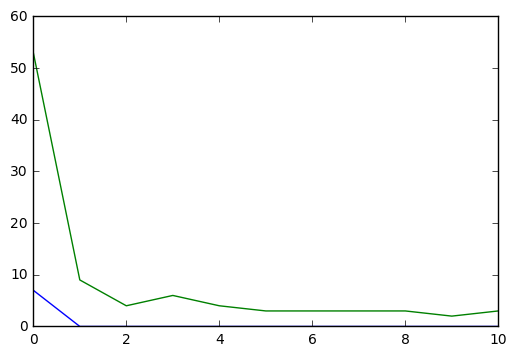

In [7]:
plt.plot(MSE_1)
plt.plot(MSE_2)

Видно, что 10 - 20 нейронов хватает для снижения ошибки до $10^{-4}$ и дальше сильного улучшения не наблюдается.
Ясно, что в случае совпадения тестовой и обучающей выборки снижение ошибки идет постоянно, а в случае OOS testing мы получаем постоянную ошибку степени $1$. Причем когда количество нейронов становится слишком большим, количества эпох не хватает для обучения и качество ухучшается. 

In [5]:
x_2train_2 = np.concatenate((np.linspace(-3, 1, 1600), np.linspace(2, 3, 400)), axis=0)
y_2train_2 = f(x_2train_2)
x_2test = np.concatenate((np.linspace(-3, 1, 1600), np.linspace(2, 3, 400)), axis=0)
y_2test = f(x_2test)
x_2test_2 = np.linspace(-3, 3, 2000) 
y_2test_2 = f(x_2test_2)

train2_2 = buildDataSet(x_2train_2, y_2train_2)
test2_1 = buildDataSet(x_2test, y_2test)
test2_2 = buildDataSet(x_2test_2, y_2test_2)

for i in range(11):
    hidden_neurons = 1+i*10
    network = buildNetwork(input_neurons, hidden_neurons, output_neurons, 
                       hiddenclass=TanhLayer, outclass=LinearLayer)
    trainer = BackpropTrainer(network, train2_2, weightdecay=0.00001)
    trainer.trainEpochs(num_epochs)
    MSE_1[i]=ModuleValidator.MSE(trainer.module, test2_1)
    MSE_2[i]=ModuleValidator.MSE(trainer.module, test2_2)


for i in range(7):
    hidden_neurons = graph_neurons[i]
    network = buildNetwork(input_neurons, hidden_neurons, output_neurons, 
                       hiddenclass=TanhLayer, outclass=LinearLayer)
    trainer = BackpropTrainer(network, train2_2, weightdecay=0.00001)
    trainer.trainEpochs(num_epochs)
    plt.figure(i)
    plt.plot(x_2test_2, trainer.module.activateOnDataset(test2_2))
    plt.plot(x_2test_2, y_2test_2)

NameError: name 'f' is not defined

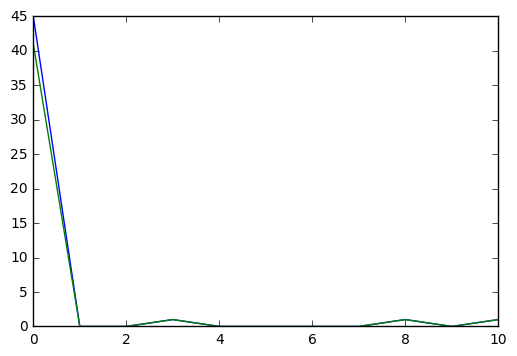

In [45]:
plt.plot(MSE_1)
plt.plot(MSE_2)

Видимо алгоритм хорошо справляется с предсказанием на промежутках, лежащих между обучающих -- ведь теперь расстояние от незнакомых признаков до знакомых не больше 0.5 -- а до этого расстояние было 1. Да и пропущенный промежуток такой, что функция почти не меняется, в предыдущем случае производная была больше 10. 